# Project: Investigate a Dataset (TMDB Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>TMDB movies dataset contains information about 10,000 movies collected from The Movie Database (TMDb), This dataset have several columns that show us some details about movies' budget, revenue, cast and genres and some other details about popularity and voting.

>There are lots of questions could be asked to explore this dataset and we'll answer some of them like :
* What are the most popular movie genres ?
* Is a higher budget associated with a higher revenue ?
* What movie genres can increase the profit ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()# a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.isnull().sum()# Check null values for each column

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
df.describe(include=['O'])# view some basic statistical details with object type

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Drama,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.shape # show the rows and columns

(10866, 21)

In [8]:
new_df = df.copy() # creating a copy of the dataframe

Taking a closer look at the columns to be familiar with them 
>the value_counts() shows how many times each value has repeated in specific column 

In [9]:
new_df['id'].value_counts(dropna=False)

42194     2
2047      1
251232    1
19819     1
279914    1
61872     1
271718    1
13668     1
101731    1
1378      1
18846     1
12889     1
9582      1
9566      1
19803     1
1370      1
173455    1
11607     1
9558      1
64853     1
46420     1
13676     1
11631     1
13561     1
11790     1
34186     1
23945     1
11655     1
15749     1
8999      1
         ..
119431    1
23174     1
19076     1
10831     1
133463    1
297596    1
17190     1
10872     1
23190     1
25241     1
693       1
29339     1
19124     1
15026     1
8881      1
91745     1
86703     1
19116     1
29355     1
8873      1
250535    1
72358     1
51876     1
14438     1
178850    1
123553    1
10912     1
15674     1
19100     1
16384     1
Name: id, Length: 10865, dtype: int64

In [10]:
new_df['imdb_id'].value_counts(dropna=False)

NaN          10
tt0411951     2
tt3294200     1
tt0077663     1
tt0099487     1
tt1629757     1
tt0829482     1
tt1204342     1
tt0109015     1
tt0091877     1
tt0834001     1
tt0960835     1
tt2463288     1
tt1093352     1
tt0091278     1
tt1179891     1
tt2265398     1
tt0115907     1
tt2569236     1
tt0104348     1
tt3077214     1
tt0882977     1
tt0816539     1
tt0337876     1
tt0059263     1
tt3138376     1
tt0090315     1
tt2548208     1
tt1957938     1
tt0078158     1
             ..
tt4504452     1
tt0095360     1
tt1709157     1
tt0151691     1
tt0095497     1
tt0434124     1
tt2322517     1
tt0112740     1
tt0105643     1
tt0113957     1
tt0815241     1
tt3625152     1
tt2182019     1
tt0257360     1
tt2275946     1
tt0427528     1
tt1523483     1
tt2518788     1
tt0482606     1
tt0827573     1
tt0057997     1
tt2234025     1
tt0119237     1
tt0818519     1
tt0283644     1
tt0865907     1
tt0367082     1
tt0105323     1
tt0114697     1
tt0110116     1
Name: imdb_id, Length: 1

In [11]:
new_df['popularity'].value_counts(dropna=False)

0.109305    2
0.114027    2
0.126182    2
0.247926    2
0.410235    2
0.122543    2
0.358694    2
0.155519    2
0.984256    2
0.468552    2
0.227220    2
0.210766    2
0.223151    2
0.150035    2
0.158021    2
0.090552    2
0.187319    2
0.363923    2
0.506241    2
0.227580    2
0.186995    2
0.275803    2
0.326556    2
0.340804    2
0.126283    2
0.214587    2
0.317301    2
0.083178    2
0.255458    2
0.028143    2
           ..
0.168354    1
3.023253    1
0.682902    1
0.663446    1
0.101795    1
0.158760    1
0.386180    1
0.064133    1
1.545055    1
0.223994    1
1.975355    1
0.618078    1
1.229505    1
2.811403    1
0.010471    1
0.100910    1
0.600563    1
0.141542    1
0.331978    1
0.821443    1
1.178831    1
0.357401    1
0.110315    1
0.077303    1
0.043209    1
0.645437    1
0.088796    1
0.155075    1
0.596755    1
0.234375    1
Name: popularity, Length: 10814, dtype: int64

In [12]:
new_df['budget'].value_counts(dropna=False)

0            5696
20000000      190
15000000      183
25000000      178
10000000      176
30000000      165
5000000       141
40000000      134
35000000      128
12000000      120
50000000      112
6000000       109
8000000       102
3000000       101
60000000       99
7000000        92
4000000        84
2000000        81
18000000       74
1000000        73
70000000       66
11000000       65
45000000       64
80000000       62
13000000       59
17000000       59
14000000       56
22000000       54
3500000        52
75000000       51
             ... 
9100000         1
34200000        1
818418          1
14200000        1
8400000         1
22997992        1
7000            1
220000          1
23600000        1
1645000         1
82500000        1
27220000        1
5112027         1
75              1
1052753         1
225000          1
115             1
12000           1
163000000       1
2240000         1
786675          1
4250000         1
207000000       1
61733           1
19885552  

In [13]:
new_df['revenue'].value_counts(dropna=False)

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
5000000         6
2000000         6
13000000        5
20000000        5
14000000        5
30000000        5
7000000         4
4300000         4
4000000         4
1000000         4
50000000        4
25000000        4
60000000        3
6700000         3
11              3
16000000        3
15              3
29000000        3
21000000        3
100000000       3
102000000       3
3               3
16              3
2500000         3
70000000        3
             ... 
42721196        1
79958599        1
40084041        1
442965          1
50752337        1
30857814        1
1400000         1
7027290         1
303788635       1
10300000        1
45916769        1
26049082        1
211989043       1
41009669        1
346079773       1
4729352         1
23159305        1
272742922       1
525             1
2626800         1
39946780        1
3117985         1
22270           1
65884703        1
4500000   

In [14]:
new_df['original_title'].value_counts(dropna=False)

Hamlet                                 4
Julia                                  3
Hercules                               3
The Black Hole                         3
Oliver Twist                           3
Beauty and the Beast                   3
Shelter                                3
Carrie                                 3
Wuthering Heights                      3
Alice in Wonderland                    3
Jane Eyre                              3
Emma                                   3
Annie                                  3
The Three Musketeers                   3
A Christmas Carol                      3
Life                                   3
Frankenstein                           3
True Grit                              2
Macbeth                                2
Taken                                  2
April Fool's Day                       2
Safe                                   2
Hairspray                              2
Day of the Dead                        2
Bottle Rocket   

In [15]:
new_df['cast'].value_counts(dropna=False)

NaN                                                                                  76
Louis C.K.                                                                            6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei               5
Bill Burr                                                                             4
Pierre Coffin                                                                         3
Sylvester Stallone|Talia Shire|Burt Young|Carl Weathers|Burgess Meredith              3
Zac Efron|Vanessa Hudgens|Ashley Tisdale|Lucas Grabeel|Corbin Bleu                    3
Jim Jefferies                                                                         3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                      3
Aziz Ansari                                                                           3
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks      3
Chris Wedge                     

In [16]:
new_df['homepage'].value_counts(dropna=False)

NaN                                                                                                               7930
http://www.missionimpossible.com/                                                                                    4
http://phantasm.com                                                                                                  4
http://www.thehungergames.movie/                                                                                     4
http://www.transformersmovie.com/                                                                                    3
http://www.thehobbit.com/                                                                                            3
http://www.americanreunionmovie.com/                                                                                 3
http://www.jeffdunham.com                                                                                            3
http://www.kungfupanda.com/                     

In [17]:
new_df['director'].value_counts(dropna=False)

Woody Allen                                     45
NaN                                             44
Clint Eastwood                                  34
Martin Scorsese                                 29
Steven Spielberg                                29
Ridley Scott                                    23
Ron Howard                                      22
Steven Soderbergh                               22
Joel Schumacher                                 21
Brian De Palma                                  20
Barry Levinson                                  19
Tim Burton                                      19
Wes Craven                                      19
Rob Reiner                                      18
John Carpenter                                  18
David Cronenberg                                18
Mike Nichols                                    18
Francis Ford Coppola                            17
Robert Zemeckis                                 17
Oliver Stone                   

In [18]:
new_df['tagline'].value_counts(dropna=False)

NaN                                                                                       2824
Based on a true story.                                                                       5
Be careful what you wish for.                                                                3
Two Films. One Love.                                                                         3
There are two sides to every love story.                                                     2
Forget About Love                                                                            2
Misery loves family.                                                                         2
Some houses are born bad.                                                                    2
The legend comes to life.                                                                    2
Inspired by True Events                                                                      2
Who is John Galt?                                 

In [19]:
new_df['keywords'].value_counts(dropna=False)

NaN                                                                                                             1493
woman director                                                                                                   134
independent film                                                                                                  82
sport                                                                                                             25
suspense                                                                                                          24
musical                                                                                                           24
duringcreditsstinger                                                                                              24
holiday                                                                                                           16
stand-up|stand up comedy                                        

In [20]:
new_df['overview'].value_counts(dropna=False)

No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   13
NaN                                                                                             

In [21]:
new_df['runtime'].value_counts(dropna=False)

90     547
95     358
100    335
93     328
97     306
96     300
91     297
94     292
92     270
98     270
88     270
89     253
105    250
101    232
99     231
102    228
85     227
103    212
87     211
106    211
108    205
104    201
86     197
107    194
110    194
112    152
84     142
120    140
111    140
109    140
      ... 
294      1
366      1
470      1
550      1
566      1
31       1
500      1
372      1
292      1
252      1
257      1
417      1
561      1
705      1
34       1
194      1
210      1
226      1
242      1
250      1
282      1
338      1
19       1
51       1
223      1
235      1
20       1
220      1
236      1
219      1
Name: runtime, Length: 247, dtype: int64

In [22]:
new_df['genres'].value_counts(dropna=False)

Comedy                                               712
Drama                                                712
Documentary                                          312
Drama|Romance                                        289
Comedy|Drama                                         280
Comedy|Romance                                       268
Horror|Thriller                                      259
Horror                                               253
Comedy|Drama|Romance                                 222
Drama|Thriller                                       138
Comedy|Family                                        102
Action|Thriller                                      101
Thriller                                              93
Drama|Comedy                                          92
Animation|Family                                      90
Crime|Drama|Thriller                                  81
Crime|Drama                                           74
Comedy|Horror                  

In [23]:
new_df['production_companies'].value_counts(dropna=False)

NaN                                                                                                                    1030
Paramount Pictures                                                                                                      156
Universal Pictures                                                                                                      133
Warner Bros.                                                                                                             84
Walt Disney Pictures                                                                                                     76
Metro-Goldwyn-Mayer (MGM)                                                                                                72
Columbia Pictures                                                                                                        72
New Line Cinema                                                                                                          61
Touchsto

In [24]:
new_df['release_date'].value_counts(dropna=False)

1/1/09      28
1/1/08      21
1/1/07      18
1/1/05      16
10/10/14    15
1/1/06      13
9/7/12      13
1/1/03      13
10/14/11    12
10/16/15    12
1/1/12      12
9/6/13      11
10/11/13    11
10/17/14    11
8/22/14     11
9/9/11      10
4/27/07     10
9/5/14      10
1/1/04      10
9/11/15     10
8/14/15     10
10/12/12     9
9/19/14      9
9/30/11      9
9/12/14      9
9/14/07      9
2/8/08       9
1/1/10       9
9/16/11      8
2/6/09       8
            ..
8/29/63      1
9/20/62      1
7/17/05      1
3/20/06      1
7/10/81      1
2/15/91      1
8/3/78       1
4/9/00       1
12/6/05      1
11/6/01      1
12/22/66     1
7/23/07      1
5/18/78      1
9/9/79       1
5/7/13       1
3/9/14       1
8/2/99       1
3/26/04      1
1/9/01       1
6/22/15      1
7/20/60      1
1/25/70      1
1/17/07      1
12/5/84      1
9/30/72      1
12/3/97      1
9/1/69       1
3/13/00      1
7/13/11      1
12/31/01     1
Name: release_date, Length: 5909, dtype: int64

In [25]:
new_df['vote_count'].value_counts(dropna=False)

10      501
11      474
12      422
13      377
14      323
15      300
16      270
17      256
18      218
19      189
21      174
20      173
23      156
22      155
24      148
25      131
26      129
29      109
28      109
27      108
33      100
31       98
30       91
32       84
35       83
37       82
36       74
42       71
44       65
48       65
       ... 
2149      1
2141      1
572       1
2629      1
588       1
596       1
3013      1
948       1
940       1
908       1
2949      1
900       1
868       1
2893      1
828       1
2853      1
788       1
772       1
2813      1
748       1
740       1
724       1
700       1
692       1
668       1
652       1
628       1
612       1
2645      1
2027      1
Name: vote_count, Length: 1289, dtype: int64

In [26]:
new_df['vote_average'].value_counts(dropna=False)

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
6.3    461
6.5    457
6.4    446
5.7    415
6.6    413
5.6    412
5.5    380
6.7    376
5.3    358
5.4    338
6.8    326
6.9    315
5.2    300
7.0    279
7.1    267
5.1    256
7.2    219
5.0    217
4.9    206
7.3    191
4.8    185
4.7    151
7.4    135
4.6    121
7.5    120
      ... 
8.0     37
3.5     31
3.6     29
3.3     22
3.4     19
3.7     19
8.1     16
3.1     13
8.3     10
8.4     10
3.0     10
3.2      9
2.9      9
2.4      7
2.8      7
8.5      6
8.2      6
2.2      3
2.7      3
2.1      3
2.6      3
2.5      2
1.5      2
2.3      2
8.8      2
8.9      1
8.6      1
9.2      1
8.7      1
2.0      1
Name: vote_average, Length: 72, dtype: int64

In [27]:
new_df['release_year'].value_counts(dropna=False)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [28]:
new_df['budget_adj'].value_counts(dropna=False)

0.000000e+00    5696
1.016400e+07      17
2.103337e+07      17
2.000000e+07      16
4.605455e+06      15
3.349690e+07      14
2.423495e+07      14
2.032801e+07      13
4.065602e+07      13
2.629171e+07      13
2.025573e+07      13
4.680167e+06      12
4.748721e+06      12
1.051669e+07      12
2.791408e+07      12
1.622504e+07      12
9.693980e+06      12
1.000000e+07      12
2.908194e+07      11
1.577503e+07      11
1.524601e+07      11
9.199996e+06      11
1.139693e+07      10
1.454097e+07      10
2.531967e+07      10
2.849233e+06      10
3.877592e+07      10
1.519180e+07      10
3.038360e+07      10
5.408346e+07      10
                ... 
7.292506e+07       1
5.283682e+07       1
7.133117e+07       1
6.458261e+07       1
2.308891e+06       1
5.772227e+05       1
2.386885e+08       1
2.110988e+07       1
4.397462e+07       1
4.075381e+06       1
1.743363e+06       1
4.504340e+07       1
6.453619e+07       1
2.072455e+07       1
5.334087e+07       1
7.082424e+07       1
1.339157e+08 

In [29]:
new_df['revenue_adj'].value_counts(dropna=False)

0.000000e+00    6016
1.438914e+07       2
5.766759e+07       2
1.000000e+06       2
2.093547e+08       2
2.910640e+07       2
8.103642e+07       2
9.670000e+05       2
8.990674e+07       2
3.172146e+07       2
1.177534e+08       2
2.633157e+07       2
6.467348e+06       1
3.669737e+08       1
9.823008e+07       1
4.156905e+05       1
1.361977e+02       1
1.695636e+08       1
6.927528e+08       1
6.203273e+07       1
1.446960e+08       1
6.696005e+07       1
8.363333e+07       1
3.367819e+07       1
1.859539e+08       1
1.838485e+08       1
1.953533e+07       1
1.756598e+08       1
1.067094e+08       1
5.800962e+05       1
                ... 
1.624722e+05       1
1.760991e+08       1
7.726199e+06       1
2.173537e+07       1
4.081567e+07       1
2.730934e+08       1
3.119749e+08       1
7.411891e+07       1
1.991874e+08       1
1.785337e+08       1
1.463691e+08       1
7.790181e+03       1
1.507504e+07       1
1.815986e+06       1
1.704399e+08       1
4.470142e+08       1
1.302935e+08 

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning (Inespecting and cleaning columns)

Dropping unuseful columns

In [31]:
new_df.drop(columns=['imdb_id', 'vote_count'], inplace=True)

Checking and Dropping Duplicates

In [32]:
new_df.duplicated().sum()

1

In [33]:
new_df.drop_duplicates(inplace=True)

Convert release_date type from oject to datetime 


In [34]:
new_df.release_date = pd.to_datetime(new_df.release_date)

We can replace the missing values with NaN

In [35]:
new_df = new_df.replace(0, np.nan)

In [36]:
new_df.head()

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09


We can add a profit column for future analysis

In [37]:
new_df.insert(19, 'profit', df['revenue']-df['budget']) # adding a new column 'profit' at the end of the dataframe

In [38]:
new_df.head()

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,1316249360


Creating a Function to split the values in columns that contain  ' | '  as separator

In [39]:
def sep_values(col_name): # col_name variable is to enter the name of the column
    item = df['id'].tolist() # converting the 'id' column into a list and stor it in a new variable item
    sep_df = col_name.str.split("|", expand=True) # splitting the values 
    sep_df.index = item # setting the index as the conerted 'id' list
    sep_df.index.name = 'id' # putting a name to the index as 'id' so that we could merge the dataframes
    sep_df = sep_df.stack() # changing the table to a long table
    sep_df = pd.DataFrame(sep_df) # making a dataframe with a column named 0
    return sep_df

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (What are the most popular movie genres ?)

>To get the movie genres, first we have split the genres column into separate values

In [40]:
genres_df = sep_values(df['genres']) # using sep_values to split the values in the column genres in a new dataframe

In [41]:
genres_df.rename(columns={0:'genres_adj'}, inplace=True) # renemaing the column named '0' with a new name 'genres_adj'

In [42]:
new_df = pd.merge(new_df, genres_df, on='id') # merging the new dataframe with the old one

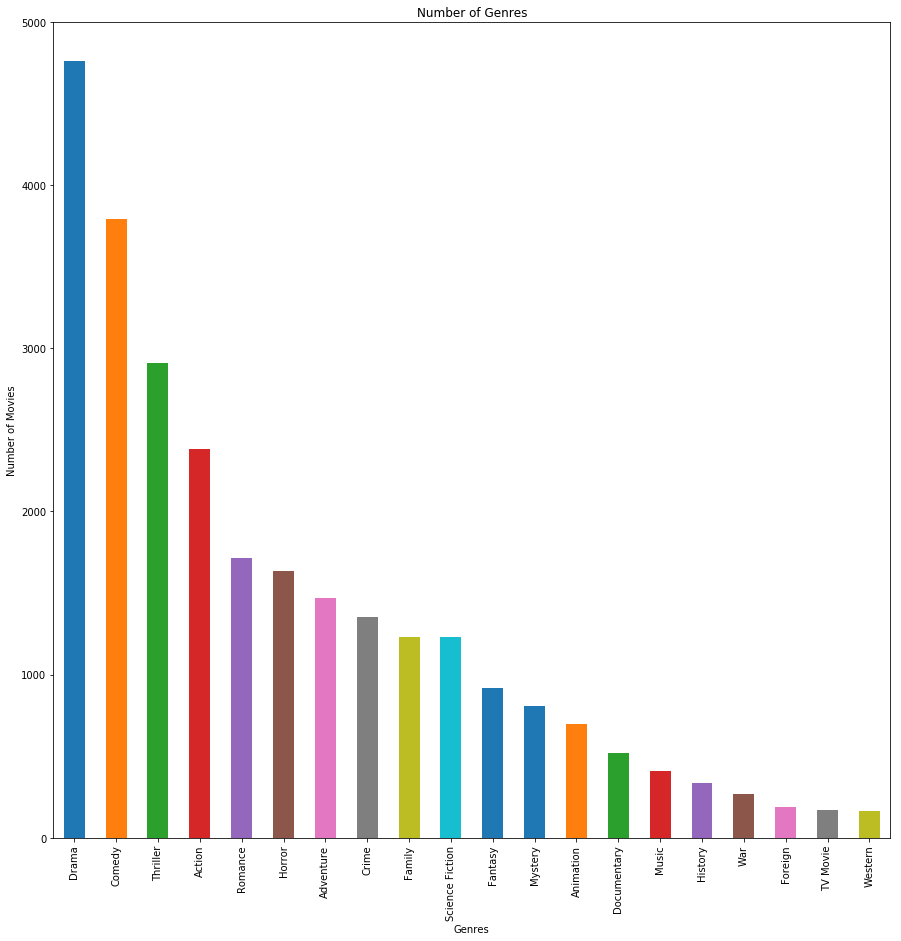

In [43]:
genres_df['genres_adj'].value_counts().plot(kind='bar', figsize=(15,15)) # making a bar chart
plt.title('Number of Genres') # putting a title on top of the graph
plt.xlabel('Genres') # x axis name
plt.ylabel('Number of Movies'); # y axis name

>We can also see the porpotion of each genre

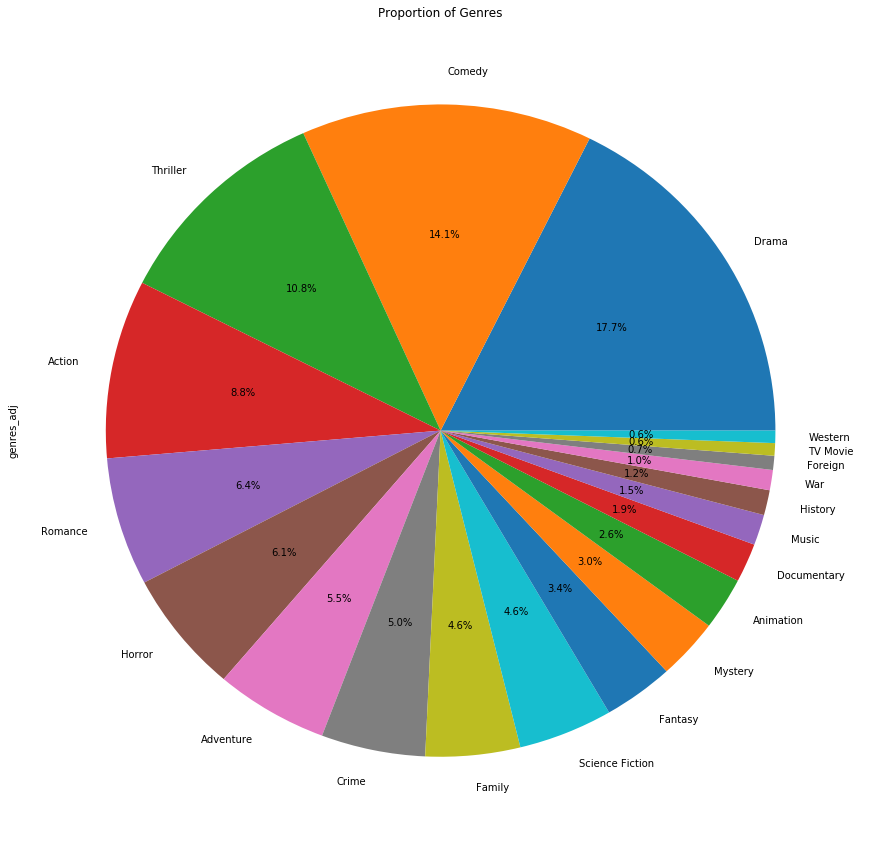

In [44]:
genres_df['genres_adj'].value_counts().plot(kind='pie', figsize=(15,15), autopct="%1.1f%%") # making a pie chart
plt.title('Proportion of Genres');

It looks like that the Drama movie genre comes first in popularity with a share equal to 17.7%
and the last movie genres are Weastern and TV Movie with a share equal to 0.6%

### Research Question 2  (Is a higher  budget associated with a higher revenue ?)
>A check if the higher budget associated with  higher revenue

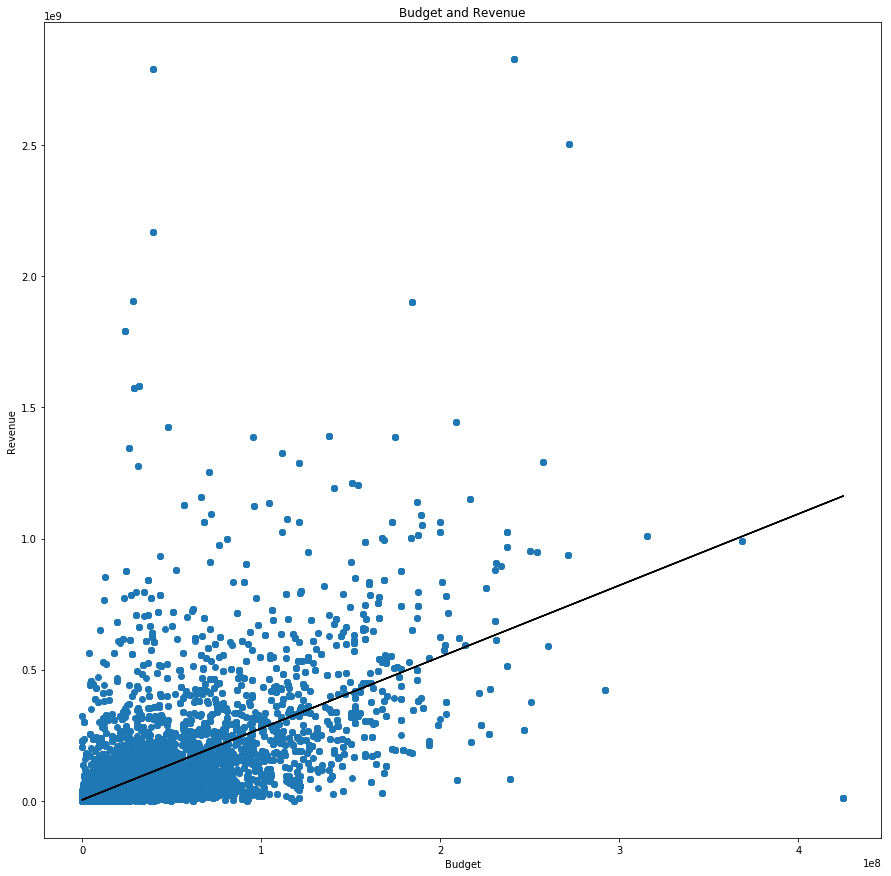

In [45]:
plt.figure(figsize = (15, 15)) # setting size of the graph
plt.title('Budget and Revenue') # putting a title on top of the graph
plt.xlabel("Budget") # x axis name
plt.ylabel('Revenue') # y axis name
plt.scatter(new_df['budget_adj'], new_df['revenue_adj']) # making a scatter graph
# putting a line to make best fit
plt.plot(df['budget_adj'], np.poly1d(np.polyfit(df['budget_adj'], df['revenue_adj'], 1))(df['budget_adj']), color = 'black');


The graph here tells that the higher the budget the higher the revenue

Though a few cases might be different as it appears that there are a few cases when the budget was low the revenue was high
and vice versa



### Research Question 3  (What genres can increase the profit ?)
>Here we can see what genres can obtain more profit for this industry

In [46]:
profit_gb_mean = new_df.groupby('genres_adj')['profit'].mean() # grouping the genres_adj column with the mean of profit column 

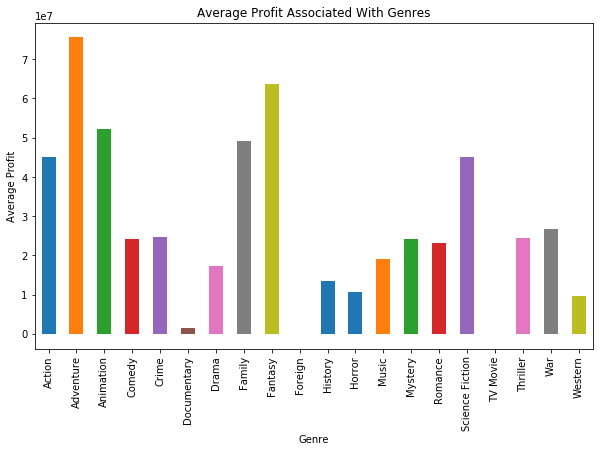

In [47]:
profit_gb_mean.plot(kind='bar', title='Average Profit Associated With Genres',figsize = (10,6)) # making a bar graph
plt.xlabel('Genre') # x asis name
plt.ylabel('Average Profit'); # y asis name

Here is a list of the movie genres and a little comparison between them that shows the profit
when to use each one of them

The Adventure genre is on the top of them then Fantasy goes next, and the lowest genres were TV Movie, Foreign and
Documentary

<a id='conclusions'></a>
## Conclusions
>In this report we would be answering three questions which are :
* What are the most popular movie genres ?
* Is a higher budget associated with a higher revenue ?
* What movie genres can increase the profit ?


>From answering the first question, we found that the most popular genre is Drama.

>For the second question the check we made was right and the higher budget the higher revenue except a few cases that will not be an issue.

>And the third one was to show which genres would increase the profit and this could be a better way to obtain profit for this industry which is to give more attention to this side, and this is diffrent from the most popular movie genre if you want to make more profit you have to follow the third question.




## Limitations
* There are missing values in the data and that effect the results.
* Alot of zero values are in budget and revenue .
* budget and revenue do not have currency unit.
* Duplicates in the data and will effect the results.
* inccorect datatype.

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0